# Ejercicio clasificación con SVM

1. Carga el conjunto de datos MNIST utilizando sklearn.datasets.load_digits().

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score
import pandas as pd
import seaborn as sns


# Paso 1: Cargar el conjunto de datos MNIST
digits = load_digits()


Divide el conjunto de datos en un conjunto de entrenamiento y otro de prueba.

In [14]:
# Paso 2: Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

Crea un transformador llamado *NormalizadorPixels* que normalice el valor de los pixeles, dicha normalización consistirá en dividir cada píxel por 255.

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin


class NormalizadorPixels(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X / 255.0


Define un Pipeline en el que se llame al anterior transformador y posteriormente se entrene un clasificador SVM utilizando sklearn.svm.SVC.

In [16]:
from sklearn.pipeline import Pipeline

# Crear el pipeline
pipeline = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC(kernel='rbf', gamma='scale'))
])

# Entrenar el clasificador SVM utilizando el pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('normalizador', NormalizadorPixels()), ('svm', SVC())])

Evalúa el rendimiento del clasificador en el conjunto de prueba utilizando métricas como la precisión, el recall y la matriz de confusión.

In [17]:
from sklearn.metrics import recall_score

# Paso 5: Evaluar el rendimiento del clasificador
y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión del clasificador SVM:", precision_score(y_test, y_pred, average='weighted'))
print("Recall del clasificador SVM:", recall_score(y_test, y_pred, average='weighted')  )
print("Matriz de confusión:")
print(conf_matrix)

Precisión del clasificador SVM: 0.9861882716049383
Recall del clasificador SVM: 0.9861111111111112
Matriz de confusión:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


Experimenta con diferentes kernels (lineal, polinomial, radial) y otros hiperparámetros de SVM para ver cómo afectan al rendimiento del modelo.

In [18]:
lista_pipelines = {}

# Crear los diferentes pipelines, he comentado los que peores resultados han dado. 
'''
pipeline_rbf = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC(kernel="rbf", gamma=5, C=0.001))
])
lista_pipelines['SVC(kernel="rbf", gamma=5, C=0.001)']= pipeline_rbf


# Crear el pipeline
pipeline_rbf_10 = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC(kernel="rbf", gamma=5, C=10))
])
lista_pipelines['SVC(kernel="rbf", gamma=5, C=10)']=  pipeline_rbf_10
'''

# Crear el pipeline
pipeline_rbf_1 = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC(kernel="rbf", gamma=5, C=1))
])
lista_pipelines['SVC(kernel="rbf", gamma=5, C=1)']=  pipeline_rbf_1

'''
# Crear el pipeline
pipeline_linear_001 = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC(kernel='linear', C=0.001))
])
lista_pipelines['SVC(kernel="linear", C=0.001)']=  pipeline_linear_001


# Crear el pipeline
pipeline_linear_10 = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC(kernel='linear', C=10))
])
lista_pipelines['SVC(kernel="linear", C=10)']=  pipeline_linear_10

# Crear el pipeline
pipeline_rbf_100 = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC(kernel='rbf', C=100, gamma=5))
])
lista_pipelines['SVC(kernel="rbf", C=100)']=  pipeline_rbf_100

# Crear el pipeline
pipeline_poly_001 = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC(kernel="poly", degree=3, coef0=1, C=0.001))
])
lista_pipelines['SVC(kernel="poly", degree=3, coef0=1, C=0.001)']=  pipeline_poly_001
'''

# Crear el pipeline
pipeline_poly_10 = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC(kernel="poly", degree=5, coef0=1, C=10))
])
lista_pipelines['SVC(kernel="poly", degree=5, coef0=1, C=10)']=  pipeline_poly_10


# Crear el pipeline
pipeline_poly_100 = Pipeline([
    ('normalizador', NormalizadorPixels()),
    ('svm', SVC(kernel="poly", degree=10, coef0=1, C=100))
])
lista_pipelines['SVC(kernel="poly", degree=10, coef0=1, C=100)']=  pipeline_poly_10


In [19]:
from sklearn.metrics import classification_report

#la siguiente función me sirve para mostrar un reporte de la clasificación. 

def print_confussion_matrix(cm):
  #Creación de Figura
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax, cmap='Greens');
  #annot=True to annotate cells, ftm=g to disable scientific notation

  # labels, title and ticks
  ax.set_xlabel('Valores Predichos');
  ax.set_ylabel('Valores Reales');
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(range(len(cm[0])));
  ax.yaxis.set_ticklabels(range(len(cm[0])));
  plt.show()


def print_score(clf, X_train, y_train, X_test, y_test):
  pred = clf.predict(X_test)
  clf_report = pd.DataFrame(classification_report(y_test,
                                                    pred,
                                                    output_dict=True))
  print("Test Result:\n================================================")
  print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
  print("_______________________________________________")
  print(f"CLASSIFICATION REPORT:\n{clf_report}")
  print("_______________________________________________")
  print(f"Confusion Matrix:\n")
  print_confussion_matrix(confusion_matrix(y_test, pred))
  print('\n')

Pipeline: SVC(kernel="rbf", gamma=5, C=1)
Test Result:
Accuracy Score: 96.94%
_______________________________________________
CLASSIFICATION REPORT:
              0          1     2          3     4          5          6  \
precision   1.0   0.965517   1.0   1.000000   1.0   0.958333   0.972222   
recall      1.0   1.000000   1.0   0.911765   1.0   0.978723   1.000000   
f1-score    1.0   0.982456   1.0   0.953846   1.0   0.968421   0.985915   
support    33.0  28.000000  33.0  34.000000  46.0  47.000000  35.000000   

                   7     8          9  accuracy   macro avg  weighted avg  
precision   0.942857   0.9   0.948718  0.969444    0.968765      0.969749  
recall      0.970588   0.9   0.925000  0.969444    0.968608      0.969444  
f1-score    0.956522   0.9   0.936709  0.969444    0.968387      0.969312  
support    34.000000  30.0  40.000000  0.969444  360.000000    360.000000  
_______________________________________________
Confusion Matrix:



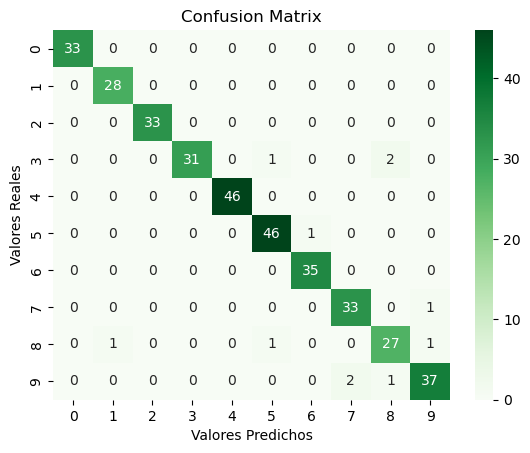




Pipeline: SVC(kernel="poly", degree=5, coef0=1, C=10)
Test Result:
Accuracy Score: 98.89%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2          3     4          5          6          7  \
precision   1.0   1.0   1.0   0.971429   1.0   1.000000   0.972222   0.970588   
recall      1.0   1.0   1.0   1.000000   1.0   0.978723   1.000000   0.970588   
f1-score    1.0   1.0   1.0   0.985507   1.0   0.989247   0.985915   0.970588   
support    33.0  28.0  33.0  34.000000  46.0  47.000000  35.000000  34.000000   

              8          9  accuracy   macro avg  weighted avg  
precision   1.0   0.974359  0.988889    0.988860      0.988974  
recall      1.0   0.950000  0.988889    0.989931      0.988889  
f1-score    1.0   0.962025  0.988889    0.989328      0.988861  
support    30.0  40.000000  0.988889  360.000000    360.000000  
_______________________________________________
Confusion Matrix:



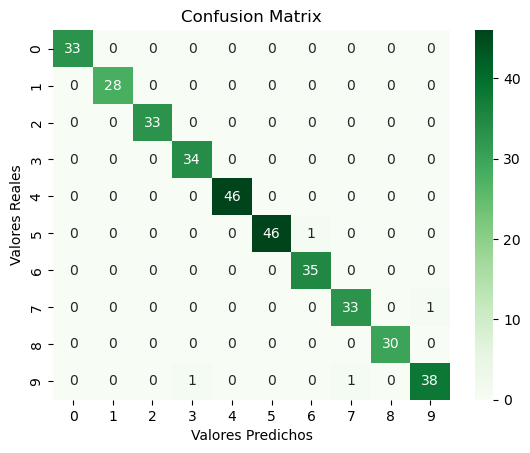




Pipeline: SVC(kernel="poly", degree=10, coef0=1, C=100)
Test Result:
Accuracy Score: 98.89%
_______________________________________________
CLASSIFICATION REPORT:
              0     1     2          3     4          5          6          7  \
precision   1.0   1.0   1.0   0.971429   1.0   1.000000   0.972222   0.970588   
recall      1.0   1.0   1.0   1.000000   1.0   0.978723   1.000000   0.970588   
f1-score    1.0   1.0   1.0   0.985507   1.0   0.989247   0.985915   0.970588   
support    33.0  28.0  33.0  34.000000  46.0  47.000000  35.000000  34.000000   

              8          9  accuracy   macro avg  weighted avg  
precision   1.0   0.974359  0.988889    0.988860      0.988974  
recall      1.0   0.950000  0.988889    0.989931      0.988889  
f1-score    1.0   0.962025  0.988889    0.989328      0.988861  
support    30.0  40.000000  0.988889  360.000000    360.000000  
_______________________________________________
Confusion Matrix:



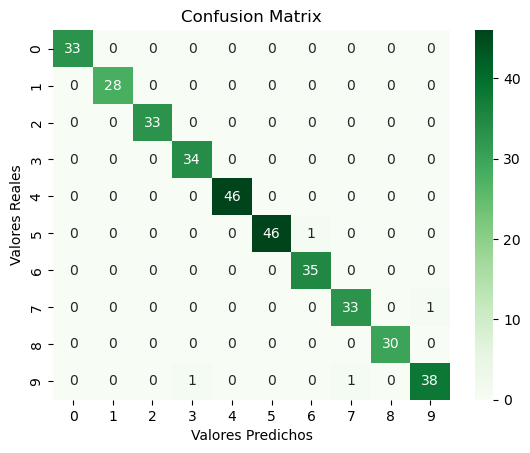

In [24]:
#A continuación realizo un análisis de los diferentes pipelines utilizando el conjunto de test. SIN utilizar CROSS VALIDATION. 
#Por cada pipeline muestro el reporte utilizando la función anterior. 
for k,pipeline in lista_pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Pipeline: {k}")
    print_score(pipeline, X_train, y_train, X_test, y_test)
    print()

In [25]:
#Vuelvo a realizar el mismo análisis pero ahora utilizo cross validation. 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

X = digits.data
y=  digits.target

k_fold = StratifiedKFold(n_splits=5) #defino un KFold con 5 iteraciones
for k,pipeline in lista_pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=k_fold, scoring='precision_weighted') #por defecto scoring='accuracy'
    print(f"Pipeline: {k}")
    print(scores.mean())
    print()

Pipeline: SVC(kernel="rbf", gamma=5, C=1)
0.9490685415361382

Pipeline: SVC(kernel="poly", degree=5, coef0=1, C=10)
0.9724510597409168

Pipeline: SVC(kernel="poly", degree=10, coef0=1, C=100)
0.9724510597409168



Visualiza algunos ejemplos de imágenes mal clasificadas para entender en qué casos el modelo tiene dificultades.

In [28]:
#el que mejor resultado me ha dado es el último de los pipelines (SVC(kernel="poly", degree=10, coef0=1, C=100))
mejor_pipeline = lista_pipelines['SVC(kernel="poly", degree=10, coef0=1, C=100)']
y_pred = mejor_pipeline.predict(X_test)

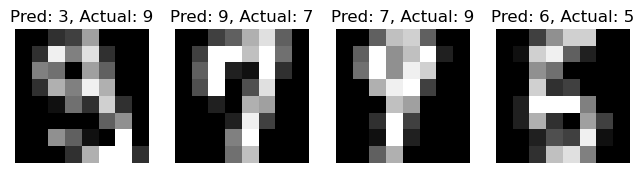

In [29]:
# Paso 6: Visualizar algunos ejemplos de imágenes mal clasificadas en mejor de los pipelines
misclassified_idx = np.where(y_pred != y_test)[0]
plt.figure(figsize=(10, 8))

for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[idx]}, Actual: {y_test[idx]}")
    plt.axis('off')
plt.show()
